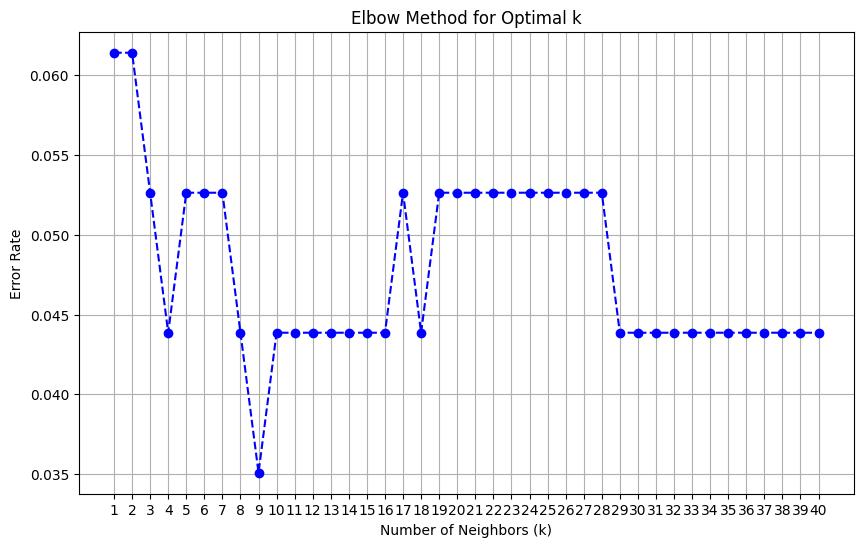

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# โหลดชุดข้อมูล Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Scaling ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แบ่งข้อมูลเป็น Training และ Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# สร้างลิสต์เก็บค่า Error Rate
error_rates = []

# วนลูปเพื่อสร้างโมเดล k-NN โดยเปลี่ยนค่า k ตั้งแต่ 1 ถึง 40
for k in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# พล็อตกราฟ Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(range(1, 41))
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# สร้าง list ว่างเพื่อเก็บค่า error rate
error_rate_c = []

# วนลูปค่า k ตั้งแต่ 1 ถึง 40
for i in range(1, 41):
    # สร้างโมเดล k-NN ด้วยค่า k = i
    model = KNeighborsClassifier(n_neighbors=i)
    
    # ฝึกโมเดลด้วยข้อมูล train ที่ผ่านการ scaling แล้ว
    model.fit(X_train_c_scaled, y_train_c)
    
    # ทำนายผลด้วยข้อมูล test ที่ผ่านการ scaling แล้ว
    pred_i = model.predict(X_test_c_scaled)
    
    # คำนวณ error rate และเก็บไว้ใน list
    error = np.mean(pred_i != y_test_c)
    error_rate_c.append(error)


NameError: name 'X_train_c_scaled' is not defined

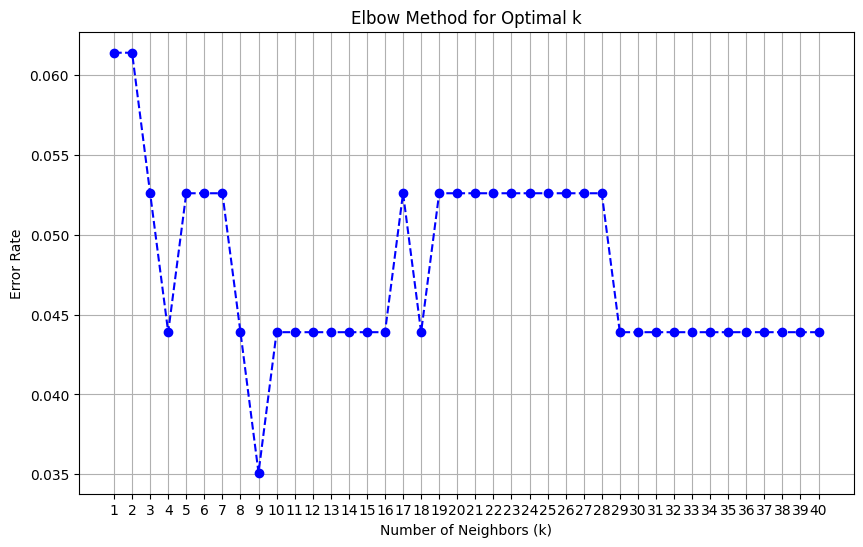

In [3]:
import matplotlib.pyplot as plt

# สมมติว่า error_rate_c มีค่าที่คำนวณไว้แล้วจากคำสั่งก่อนหน้า
error_rate_c = [
    0.0614, 0.0614, 0.0526, 0.0439, 0.0526, 0.0526, 0.0526, 0.0439, 0.0351, 0.0439,
    0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0526, 0.0439, 0.0526, 0.0526,
    0.0526, 0.0526, 0.0526, 0.0526, 0.0526, 0.0526, 0.0526, 0.0526, 0.0439, 0.0439,
    0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439, 0.0439
]

# พล็อตกราฟ Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate_c, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(range(1, 41))
plt.grid(True)
plt.show()


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# โหลดข้อมูล
data = load_breast_cancer()
X = data.data
y = data.target

# Scaling ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แบ่งข้อมูลเป็น train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# สร้างโมเดลด้วย k=1
model_k1 = KNeighborsClassifier(n_neighbors=1)
model_k1.fit(X_train, y_train)
y_pred_k1 = model_k1.predict(X_test)
print("📌 Classification Report for k=1:\n")
print(classification_report(y_test, y_pred_k1, target_names=data.target_names))

# สร้างโมเดลด้วย k=9 (จากจุดข้อศอก)
model_k9 = KNeighborsClassifier(n_neighbors=9)
model_k9.fit(X_train, y_train)
y_pred_k9 = model_k9.predict(X_test)
print("\n📌 Classification Report for k=9:\n")
print(classification_report(y_test, y_pred_k9, target_names=data.target_names))


📌 Classification Report for k=1:

              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


📌 Classification Report for k=9:

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

